In [2]:
from typing import List, Tuple, Dict, Set
import numpy as np
import heapq
from math import sqrt
import matplotlib.pyplot as plt

Path found with 22 steps!


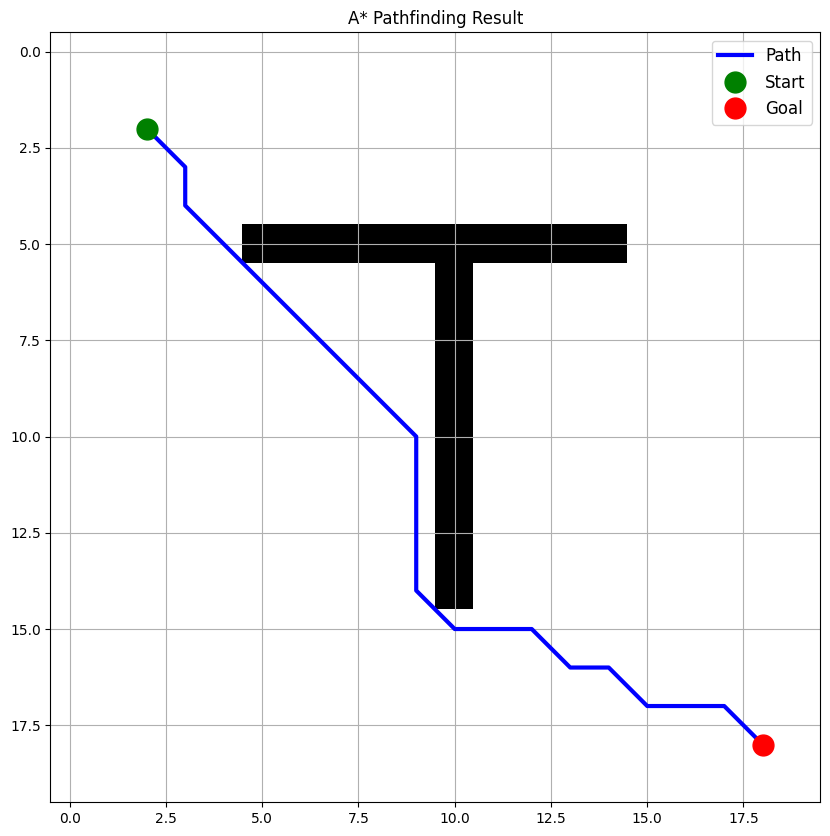

In [3]:
def create_node(position: Tuple[int, int], g: float = float('inf'), 
                h: float = 0.0, parent: Dict = None) -> Dict:
    """
    Create a node for the A* algorithm.
    
    Args:
        position: (x, y) coordinates of the node
        g: Cost from start to this node (default: infinity)
        h: Estimated cost from this node to goal (default: 0)
        parent: Parent node (default: None)
    
    Returns:
        Dictionary containing node information
    """
    return {
        'position': position,
        'g': g,
        'h': h,
        'f': g + h,
        'parent': parent
    }

def calculate_heuristic(pos1: Tuple[int, int], pos2: Tuple[int, int]) -> float:
    """
    Calculate the estimated distance between two points using Euclidean distance.
    """
    x1, y1 = pos1
    x2, y2 = pos2
    return sqrt((x2 - x1)**2 + (y2 - y1)**2)
def get_valid_neighbors(grid: np.ndarray, position: Tuple[int, int]) -> List[Tuple[int, int]]:
    """
    Get all valid neighboring positions in the grid.
    
    Args:
        grid: 2D numpy array where 0 represents walkable cells and 1 represents obstacles
        position: Current position (x, y)
    
    Returns:
        List of valid neighboring positions
    """
    x, y = position
    rows, cols = grid.shape
    
    # All possible moves (including diagonals)
    possible_moves = [
        (x+1, y), (x-1, y),    # Right, Left
        (x, y+1), (x, y-1),    # Up, Down
        (x+1, y+1), (x-1, y-1),  # Diagonal moves
        (x+1, y-1), (x-1, y+1)
    ]
    
    return [
        (nx, ny) for nx, ny in possible_moves
        if 0 <= nx < rows and 0 <= ny < cols  # Within grid bounds
        and grid[nx, ny] == 0                # Not an obstacle
    ]
def reconstruct_path(goal_node: Dict) -> List[Tuple[int, int]]:
    """
    Reconstruct the path from goal to start by following parent pointers.
    """
    path = []
    current = goal_node
    
    while current is not None:
        path.append(current['position'])
        current = current['parent']
        
    return path[::-1]  # Reverse to get path from start to goal

def find_path(grid: np.ndarray, start: Tuple[int, int], 
              goal: Tuple[int, int]) -> List[Tuple[int, int]]:
    """
    Find the optimal path using A* algorithm.
    
    Args:
        grid: 2D numpy array (0 = free space, 1 = obstacle)
        start: Starting position (x, y)
        goal: Goal position (x, y)
    
    Returns:
        List of positions representing the optimal path
    """
    # Initialize start node
    start_node = create_node(
        position=start,
        g=0,
        h=calculate_heuristic(start, goal)
    )
    
    # Initialize open and closed sets
    open_list = [(start_node['f'], start)]  # Priority queue
    open_dict = {start: start_node}         # For quick node lookup
    closed_set = set()                      # Explored nodes
    
    while open_list:
        # Get node with lowest f value
        _, current_pos = heapq.heappop(open_list)
        current_node = open_dict[current_pos]
        
        # Check if we've reached the goal
        if current_pos == goal:
            return reconstruct_path(current_node)
            
        closed_set.add(current_pos)
        
        # Explore neighbors
        for neighbor_pos in get_valid_neighbors(grid, current_pos):
            # Skip if already explored
            if neighbor_pos in closed_set:
                continue
                
            # Calculate new path cost
            tentative_g = current_node['g'] + calculate_heuristic(current_pos, neighbor_pos)
            
            # Create or update neighbor
            if neighbor_pos not in open_dict:
                neighbor = create_node(
                    position=neighbor_pos,
                    g=tentative_g,
                    h=calculate_heuristic(neighbor_pos, goal),
                    parent=current_node
                )
                heapq.heappush(open_list, (neighbor['f'], neighbor_pos))
                open_dict[neighbor_pos] = neighbor
            elif tentative_g < open_dict[neighbor_pos]['g']:
                # Found a better path to the neighbor
                neighbor = open_dict[neighbor_pos]
                neighbor['g'] = tentative_g
                neighbor['f'] = tentative_g + neighbor['h']
                neighbor['parent'] = current_node
    
    return []  # No path found

def visualize_path(grid: np.ndarray, path: List[Tuple[int, int]]):
    """
    Visualize the grid and found path.
    """
    plt.figure(figsize=(10, 10))
    plt.imshow(grid, cmap='binary')
    
    if path:
        path = np.array(path)
        plt.plot(path[:, 1], path[:, 0], 'b-', linewidth=3, label='Path')
        plt.plot(path[0, 1], path[0, 0], 'go', markersize=15, label='Start')
        plt.plot(path[-1, 1], path[-1, 0], 'ro', markersize=15, label='Goal')
    
    plt.grid(True)
    plt.legend(fontsize=12)
    plt.title("A* Pathfinding Result")
    plt.show()

# Create a sample grid
grid = np.zeros((20, 20))  # 20x20 grid, all free space initially
# Add some obstacles
grid[5:15, 10] = 1  # Vertical wall
grid[5, 5:15] = 1   # Horizontal wall
# Define start and goal positions
start_pos = (2, 2)
goal_pos = (18, 18)
# Find the path
path = find_path(grid, start_pos, goal_pos)
if path:
    print(f"Path found with {len(path)} steps!")
    visualize_path(grid, path)
else:
    print("No path found!")

In [1]:
import math
import random
tablero = [] #Nuestro tablero inicialmente tiene casillas vacias
casillasvacias = []
Tablero_Filas = 3
Tablero_Columnas = 3

# Inicializamos el tablero
for i in range(9):
    tablero.append(' ')
    casillasvacias.append(i)

# Coloca una ficha en el tablero
def numero(literal, inferior, superior):
    while True:
     Valor = input(literal)
     while(not Valor.isnumeric()):
        print("Solo se admiten numeros entre {0} y {1}".format(inferior, superior))
        Valor = input(literal)
     coor = int(Valor)
     if(coor >= inferior and coor<= superior):
        return coor
     else:
         print("El valor es incorrecto, introduzca un numero entre {0} y {1}".format(inferior, superior))

def colocarficha(ficha):
    print("Dame la posicion de una ficha")
    while True:
        fila = numero("Fila entre [1 y 3]: ", 1, 3)-1 #Restamos 1 ya que el rango esta entre 0 y 2
        columna = numero("Columna entre [1 y 3]: ", 1, 3)-1
        # Como el tablero es de 3x3
        casilla = fila*3 + columna
        if(tablero[casilla] != ' '):
            print("La casilla esta ocupada")
            # Esa casilla esta cubierta
        else:
            tablero[casilla] = ficha
            return casilla

def colocarfichaMaquina(ficha, fichaContricante):
   random.shuffle(casillasvacias)
   for casilla in casillasvacias:
      if(hemosGanado(casilla,ficha)):
         tablero[casilla] = ficha
         return casilla
      if(hemosGanado(casilla,fichaContricante)):
         tablero[casilla] = ficha
         return casilla
   for casilla in casillasvacias:
      tablero[casilla] = ficha
      return casilla

def pintarTablero():
    pos = 0
    print(("-" * 18))
    for fila in range (3):
        for columna in range (3):
         print("| ", tablero[pos]," ", end ="")
         pos += 1
        print("|\n", ("-" *18))

def numeroHermanos(casilla, ficha, v, h):
   f = math.floor(casilla/Tablero_Columnas)
   c = casilla % Tablero_Columnas
   fila_nueva = f+v
   if(fila_nueva<0 or fila_nueva>= Tablero_Filas):
      return 0
   columna_nueva = c+h
   if(columna_nueva<0 or columna_nueva>= Tablero_Columnas):
      return 0
   pos = (fila_nueva*Tablero_Columnas + columna_nueva)
   if(tablero[pos]!=ficha):
      return 0
   else:
      return 1 + numeroHermanos(pos, ficha, v, h)

def hemosGanado(casilla, ficha):
   hermanos = numeroHermanos(casilla,ficha,-1,-1) + numeroHermanos(casilla,ficha, 1 , 1)
   if(hermanos == 2):
      return True
   hermanos = numeroHermanos(casilla,ficha,1,-1) + numeroHermanos(casilla,ficha, -1 , 1)
   if(hermanos == 2):
      return True
   hermanos = numeroHermanos(casilla,ficha,-1,0) + numeroHermanos(casilla,ficha, 1 , 0)
   if(hermanos == 2):
      return True
   hermanos = numeroHermanos(casilla,ficha,0,-1) + numeroHermanos(casilla,ficha, 0 , 1)
   if(hermanos == 2):
      return True

jugadores = []
numerojugadores = numero("Numero de jugadores",0,2)
for i in range(numerojugadores):
   jugadores.append({"nombre":input("Nombre del jugador: "+str(i+1)+": "),"tipo":"H"})
for i in range(2-numerojugadores):
   jugadores.append({"nombre":"Maquina "+str(i+1),"tipo":"M"})

print("\n Empezamos la partida con los jugadores")
for jugador in jugadores:
   print("\t", jugador["nombre"])

empieza = numero("¿Que jugador empieza? [1="+jugadores[0]["nombre"]+",2="+jugadores[1]["nombre"]+"]: ",1,2)
if(empieza==2):
   jugadores.reverse()
# Iniciamos el juego
continuar = True
fichasentablero = 0
while continuar:
    #Pedimos posicion de la ficha
    pintarTablero()
    numjugador = (fichasentablero&1)
    ficha = 'X' if numjugador == 1 else 'O'
    if(jugadores[numjugador]["tipo"]=="H"): 
      casilla = colocarficha(ficha)
    else:
     casilla = colocarfichaMaquina(ficha,'X' if numjugador==0 else 'O')
    casillasvacias.remove(casilla)
    if(hemosGanado(casilla, ficha)):
       continuar = False
       print(jugadores[numjugador]["nombre"], "!!!!Has ganado¡¡¡¡")
    fichasentablero += 1
    if(fichasentablero ==9 and continuar):
        continuar = False
        print("Tablas")
pintarTablero()


 Empezamos la partida con los jugadores
	 Ale
	 Maquina 1
------------------
|     |     |     |
 ------------------
|     |     |     |
 ------------------
|     |     |     |
 ------------------
------------------
|     |     |     |
 ------------------
|     |     |     |
 ------------------
|     |     |  O  |
 ------------------
Dame la posicion de una ficha
------------------
|     |     |     |
 ------------------
|     |  X  |     |
 ------------------
|     |     |  O  |
 ------------------
------------------
|     |  O  |     |
 ------------------
|     |  X  |     |
 ------------------
|     |     |  O  |
 ------------------
Dame la posicion de una ficha
------------------
|     |  O  |  X  |
 ------------------
|     |  X  |     |
 ------------------
|     |     |  O  |
 ------------------
------------------
|     |  O  |  X  |
 ------------------
|     |  X  |     |
 ------------------
|  O  |     |  O  |
 ------------------
Dame la posicion de una ficha
-----------------